# Урок первый.  Описательные статистики

In [7]:
data<-read.csv("dataDescriptiveStatistics.csv", sep=";", dec=".")

Описательная статистика

In [8]:
mean(data$Distance)
median(data$Distance)
quantile(data$Distance)

[1] 6143.468

[1] 5439.326

0%        25%        50%        75%       100% 
  693.1873  3747.4136  5439.3261  7931.9621 19293.8276

In [9]:
summary(data)

    Distance           Class        
 Min.   :  693.2   Min.   :0.00000  
 1st Qu.: 3747.4   1st Qu.:0.00000  
 Median : 5439.3   Median :0.00000  
 Mean   : 6143.5   Mean   :0.04035  
 3rd Qu.: 7932.0   3rd Qu.:0.00000  
 Max.   :19293.8   Max.   :1.00000  

In [10]:
var(data$Distance)

[1] 11133685

In [11]:
var(data$Distance)^0.5

[1] 3336.718

In [12]:
sd(data$Distance)

[1] 3336.718

In [13]:
dev.new(width=50, height=40)
plot(data$Distance)

# Урок второй.  Построение графиков

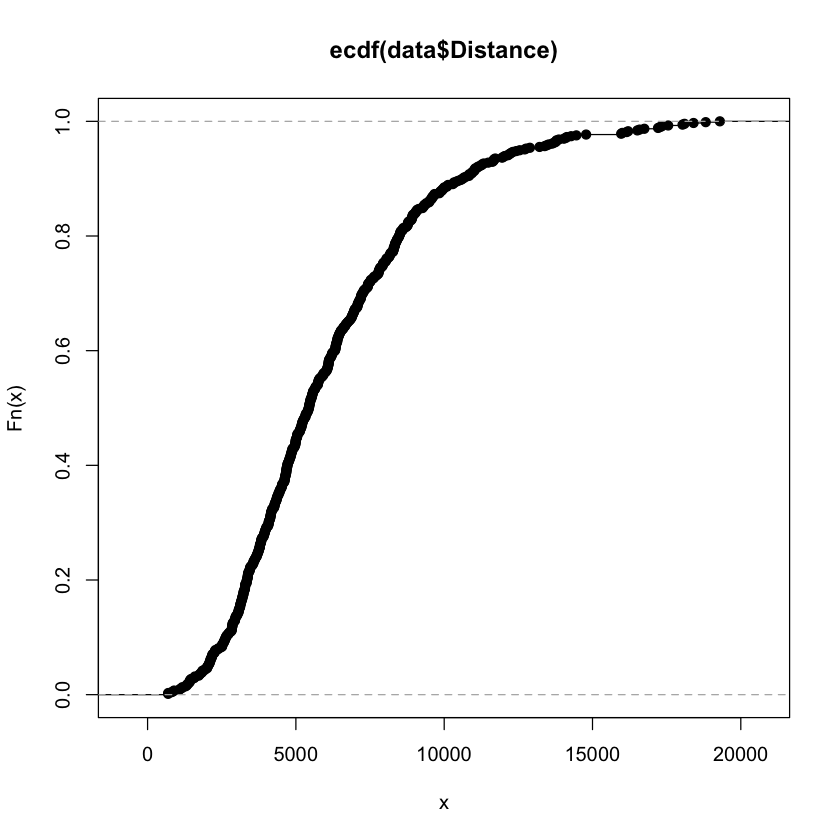

In [14]:
plot(ecdf(data$Distance))

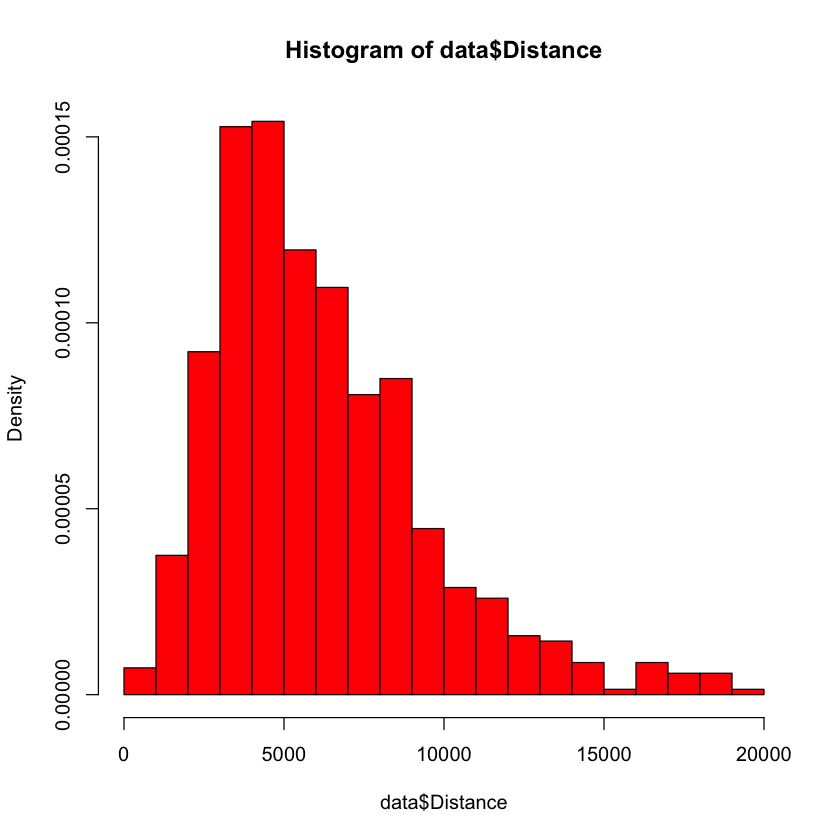

In [15]:
hist(data$Distance, breaks="FD", col = "red", freq = FALSE)

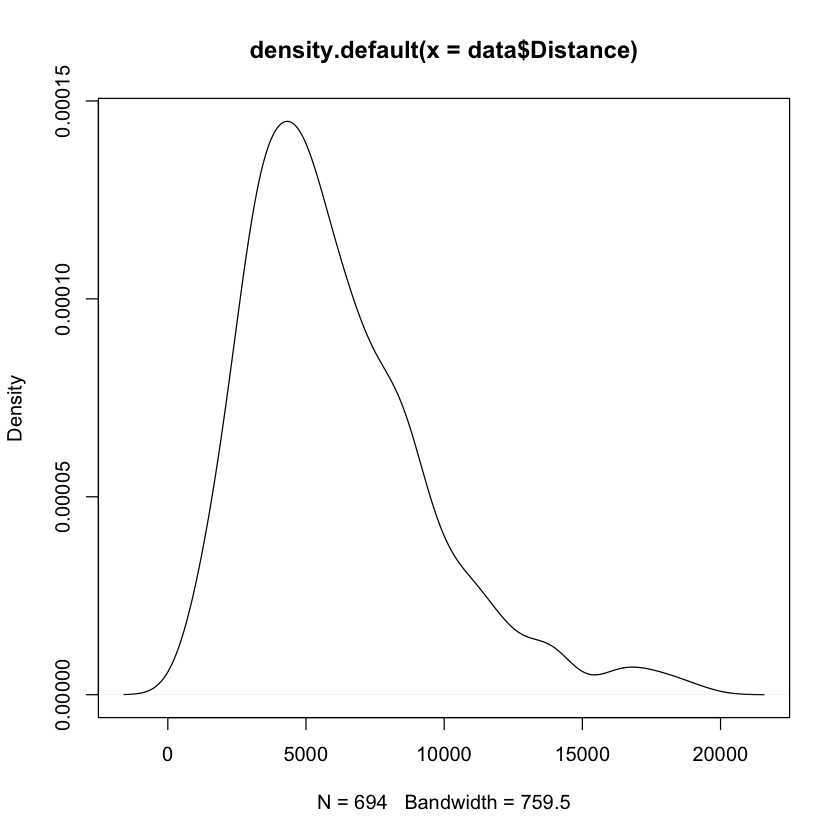

In [16]:
plot(density(data$Distance))

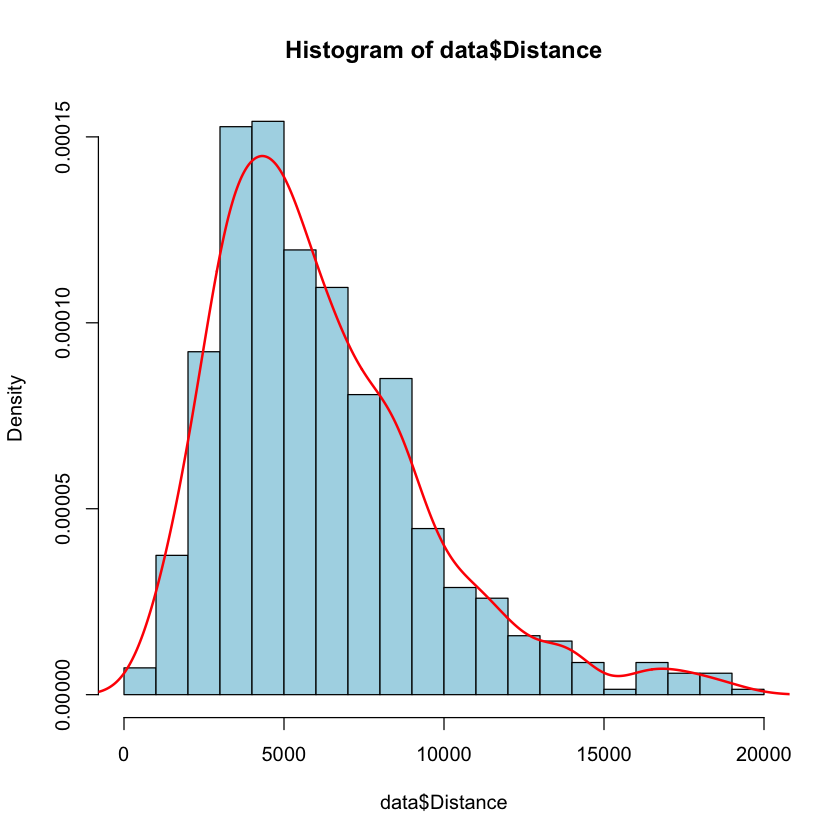

In [17]:
hist(data$Distance, breaks = "FD", freq = FALSE, col = "lightblue")
lines(density(data$Distance), col = "red", lwd = 2)

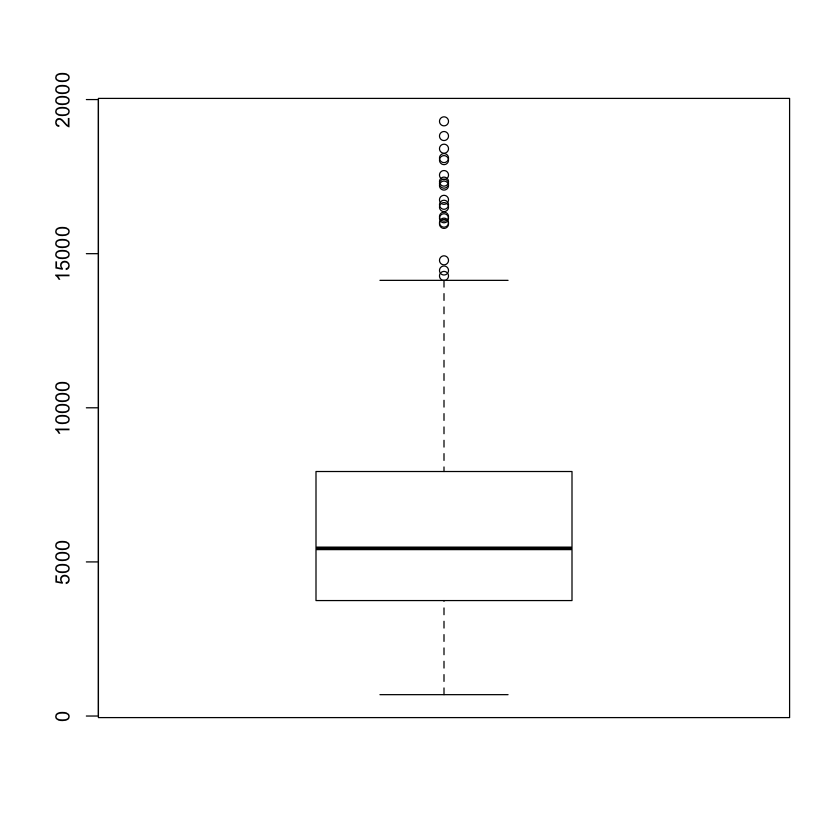

In [18]:
boxplot(data$Distance)

# Урок второй. Построение критериев согласия в R

In [1]:
install.packages("nortest", repos='http://cran.us.r-project.org')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [27]:
library(nortest)

In [29]:
ad.test(data[,1])


	Anderson-Darling normality test

data:  data[, 1]
A = 12.844, p-value < 2.2e-16


гипотеза отвергается, так как очень маленькое p value

In [67]:
cvm.test(data[,1], exact = FALSE)

ERROR: Error in cvm.test(data[, 1], exact = FALSE): unused argument (exact = FALSE)


In [31]:
lillie.test(data[,1])


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data[, 1]
D = 0.095836, p-value < 2.2e-16


In [32]:
pearson.test(data[,1])


	Pearson chi-square normality test

data:  data[, 1]
P = 141.08, p-value < 2.2e-16


In [34]:
logData <-log(data[,1])

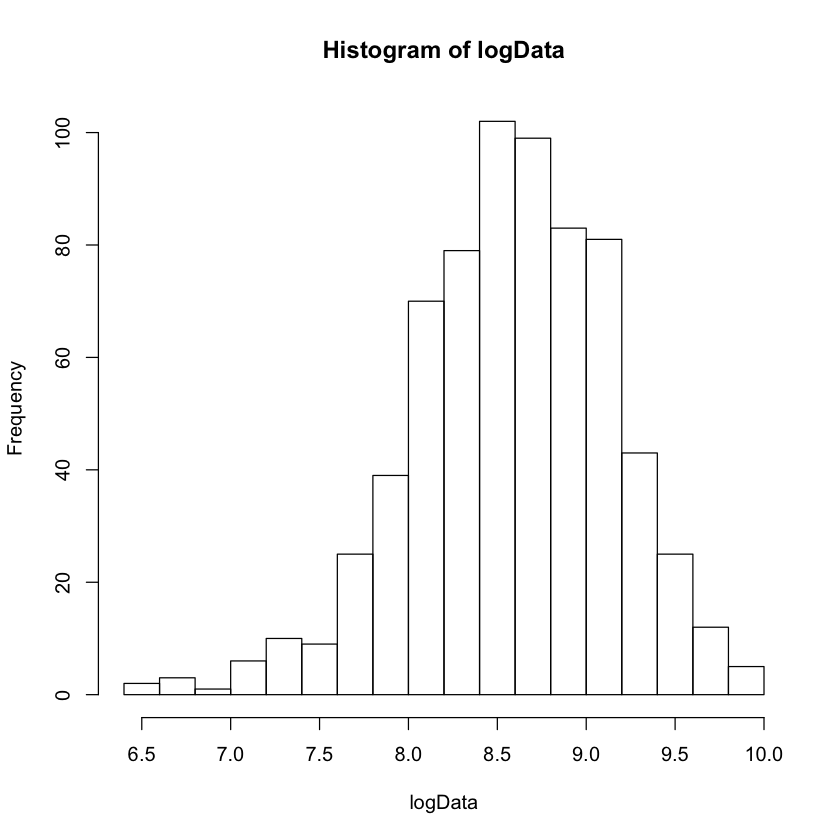

In [36]:
hist(logData, breaks = "FD")

In [37]:
ad.test(logData)


	Anderson-Darling normality test

data:  logData
A = 1.2167, p-value = 0.003581


In [38]:
lillie.test(logData)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  logData
D = 0.031819, p-value = 0.09232


# Вычисление коэффициента корреляции в R

In [40]:
dataRegression <- read.csv("dataRegression.csv", sep=";", dec=".")

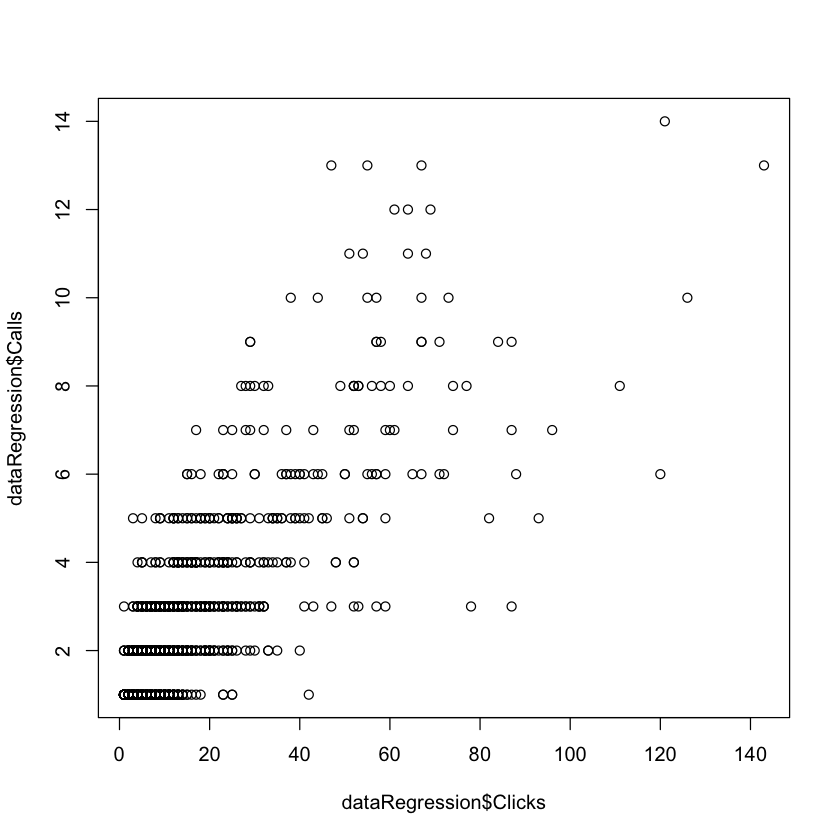

In [41]:
plot(x=dataRegression$Clicks, y=dataRegression$Calls)

In [42]:
cor(dataRegression$Clicks,dataRegression$Calls, method = "pearson")

[1] 0.8111203

In [43]:
cor(dataRegression$Clicks,dataRegression$Calls, method = "kendal")

[1] 0.6134505

In [45]:
cor(dataRegression$Clicks,dataRegression$Calls, method = "spearman")

[1] 0.7271339

Чтобы проверить значимость коэффициентов корреляции, нужне t критерий Стьюдента

In [52]:
cor.test(dataRegression$Clicks,dataRegression$Calls, alternative = "two.sided", method = "pearson", exact = FALSE)


	Pearson's product-moment correlation

data:  dataRegression$Clicks and dataRegression$Calls
t = 57.079, df = 1694, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7941838 0.8267976
sample estimates:
      cor 
0.8111203 


In [53]:
cor.test(dataRegression$Clicks,dataRegression$Calls, alternative = "two.sided", method = "spearman", exact = FALSE)


	Spearman's rank correlation rho

data:  dataRegression$Clicks and dataRegression$Calls
S = 221858348, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7271339 


In [49]:
cor.test(dataRegression$Clicks,dataRegression$Calls, alternative = "two.sided", method = "kendal")


	Kendall's rank correlation tau

data:  dataRegression$Clicks and dataRegression$Calls
z = 32.365, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.6134505 


p value маленький, то нужно отвергнуть нулевую гипотезу о том, что коэффициент корреляции = 0

# Урок четвертый. Регрессия

In [52]:
summary(dataRegression)

     Clicks           Calls            Sites           Position     
 Min.   :  1.00   Min.   : 1.000   Min.   : 1.000   Min.   :  1.00  
 1st Qu.:  3.00   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.:  5.00  
 Median :  5.00   Median : 1.000   Median : 2.000   Median : 15.00  
 Mean   : 10.96   Mean   : 2.106   Mean   : 3.833   Mean   : 44.83  
 3rd Qu.: 12.00   3rd Qu.: 2.000   3rd Qu.: 4.000   3rd Qu.: 48.00  
 Max.   :143.00   Max.   :14.000   Max.   :46.000   Max.   :645.00  
   DayOfWeek    HasSocialAccounts      nom1            nom2       
 Min.   :1.00   Min.   :0.0000    Min.   :0.000   Min.   :0.0000  
 1st Qu.:2.00   1st Qu.:0.0000    1st Qu.:0.000   1st Qu.:0.0000  
 Median :4.00   Median :1.0000    Median :0.000   Median :0.0000  
 Mean   :3.61   Mean   :0.6875    Mean   :0.135   Mean   :0.1598  
 3rd Qu.:5.00   3rd Qu.:1.0000    3rd Qu.:0.000   3rd Qu.:0.0000  
 Max.   :7.00   Max.   :1.0000    Max.   :1.000   Max.   :1.0000  
      nom3             nom4             nom5    

In [57]:
regression <- lm(Sites~Clicks+Calls++HasSocialAccounts+nom1+nom2+nom3+nom4+nom5+nom6, data=dataRegression)

In [58]:
summary(regression)


Call:
lm(formula = Sites ~ Clicks + Calls + +HasSocialAccounts + nom1 + 
    nom2 + nom3 + nom4 + nom5 + nom6, data = dataRegression)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.5689  -0.9306  -0.1856   0.6021  25.2987 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.01743    0.25752  -0.068   0.9461    
Clicks             0.20882    0.00709  29.452   <2e-16 ***
Calls              0.73477    0.05732  12.819   <2e-16 ***
HasSocialAccounts  0.26621    0.13481   1.975   0.0485 *  
nom1              -0.09707    0.28647  -0.339   0.7348    
nom2              -0.07622    0.27898  -0.273   0.7847    
nom3              -0.35019    0.27232  -1.286   0.1986    
nom4              -0.37979    0.27057  -1.404   0.1606    
nom5              -0.09312    0.27776  -0.335   0.7375    
nom6               0.21763    0.32173   0.676   0.4989    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.53

Так как значимыми оказались только Clicks;  Calls; HasSocialAccount, то перестроим регрессию

In [59]:
regression <- lm(Sites~Clicks+Calls+HasSocialAccounts, data=dataRegression)

In [60]:
summary(regression)


Call:
lm(formula = Sites ~ Clicks + Calls + HasSocialAccounts, data = dataRegression)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6981  -0.8729  -0.2196   0.6127  25.6369 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.170244   0.129450  -1.315   0.1886    
Clicks             0.210919   0.007045  29.937   <2e-16 ***
Calls              0.713904   0.056808  12.567   <2e-16 ***
HasSocialAccounts  0.274656   0.134791   2.038   0.0417 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.535 on 1692 degrees of freedom
Multiple R-squared:  0.7464,	Adjusted R-squared:  0.746 
F-statistic:  1660 on 3 and 1692 DF,  p-value: < 2.2e-16


Проверим мультиколениарность между переменной Клики и звонки

In [61]:
cor(dataRegression$Clicks,dataRegression$Calls)

[1] 0.8111203

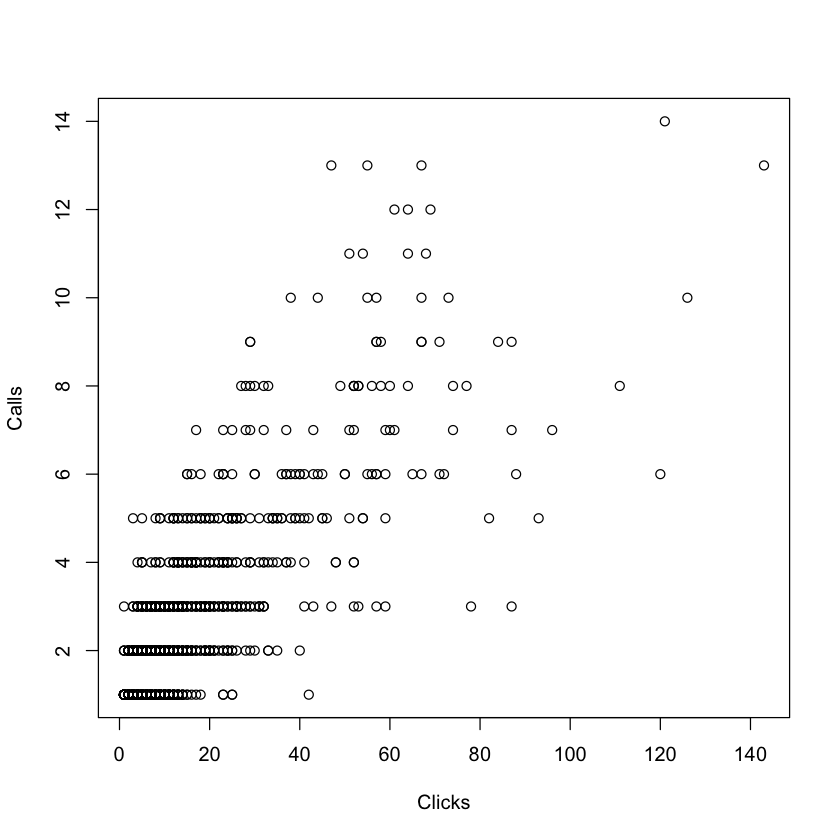

In [62]:
plot(dataRegression$Clicks,dataRegression$Calls, 
     xlab = "Clicks", ylab = "Calls")

In [79]:
regression <- lm(Sites~Clicks+HasSocialAccounts, data=dataRegression)

In [90]:
summary(regression)


Call:
lm(formula = Sites ~ Clicks + HasSocialAccounts, data = dataRegression)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.7047  -0.9301  -0.2419   0.5542  24.5747 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.59816    0.11927   5.015 5.85e-07 ***
Clicks             0.28254    0.00433  65.252  < 2e-16 ***
HasSocialAccounts  0.20175    0.14077   1.433    0.152    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.649 on 1693 degrees of freedom
Multiple R-squared:  0.7228,	Adjusted R-squared:  0.7224 
F-statistic:  2207 on 2 and 1693 DF,  p-value: < 2.2e-16


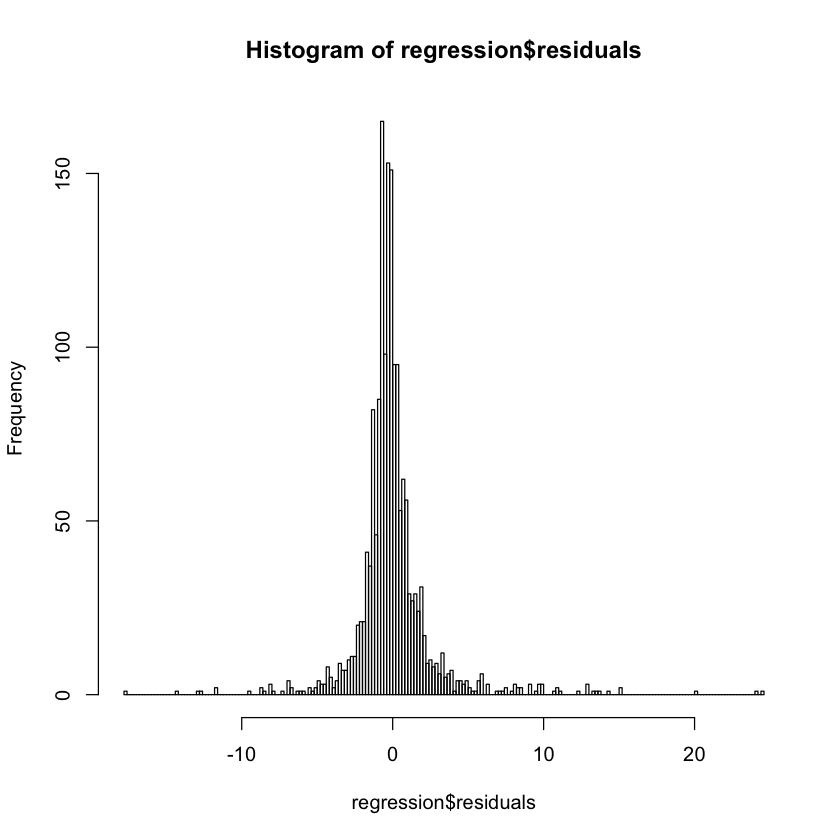

In [80]:
hist(regression$residuals, breaks = "FD")

In [81]:
shapiro.test(regression$residuals)


	Shapiro-Wilk normality test

data:  regression$residuals
W = 0.74568, p-value < 2.2e-16


p-value очень маленький, что говорит, что мы должны отвергнуть гипотезу о нормальности остатков

In [82]:
wilcox.test(regression$residuals)


	Wilcoxon signed rank test with continuity correction

data:  regression$residuals
V = 597167, p-value = 1.308e-09
alternative hypothesis: true location is not equal to 0


p-value очень маленький, что говорит, что нужно отклонить нулевую гипотезу

проверим независимость остатков при помощи дарбина уотсона

In [89]:
ad.test(regression$residuals)


	Anderson-Darling normality test

data:  regression$residuals
A = 112.38, p-value < 2.2e-16


In [92]:
library(car)

In [93]:
car::durbinWatsonTest(regression)

 lag Autocorrelation D-W Statistic p-value
   1      0.01729973      1.948425   0.294
 Alternative hypothesis: rho != 0

In [101]:
newData<-data.frame(Clicks=c(40,52,6999),HasSocialAccounts=c(1,1,0))

In [102]:
predict(regression, newData)

1          2          3 
  12.10149   15.49197 1978.09301

In [106]:
predict(regression, newData, se.fit = TRUE, interval="confidence")

fit,lwr,upr
12.10149,11.82382,12.37916
15.49197,15.12478,15.85916
1978.09301,1918.71374,2037.47228


Если нужно учесть дисперсию в наших данных:

In [107]:
predict(regression, newData, se.fit = TRUE, interval="prediction")

fit,lwr,upr
12.10149,6.897485,17.30550
15.49197,10.282417,20.70152
1978.09301,1918.486785,2037.69923


# Создание и сравние групп

Урок

In [17]:
dataD<-read.csv("dataRegression_3modul.csv", sep=";", dec=".", header = TRUE)

In [19]:
summary(dataD)

     Clicks           Calls            Sites           Position     
 Min.   :  1.00   Min.   : 1.000   Min.   : 1.000   Min.   :  1.00  
 1st Qu.:  3.00   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.:  5.00  
 Median :  5.00   Median : 1.000   Median : 2.000   Median : 15.00  
 Mean   : 10.96   Mean   : 2.106   Mean   : 3.833   Mean   : 44.83  
 3rd Qu.: 12.00   3rd Qu.: 2.000   3rd Qu.: 4.000   3rd Qu.: 48.00  
 Max.   :143.00   Max.   :14.000   Max.   :46.000   Max.   :645.00  
   DayOfWeek    HasSocialAccounts      nom1            nom2       
 Min.   :1.00   Min.   :0.0000    Min.   :0.000   Min.   :0.0000  
 1st Qu.:2.00   1st Qu.:0.0000    1st Qu.:0.000   1st Qu.:0.0000  
 Median :4.00   Median :1.0000    Median :0.000   Median :0.0000  
 Mean   :3.61   Mean   :0.6875    Mean   :0.135   Mean   :0.1598  
 3rd Qu.:5.00   3rd Qu.:1.0000    3rd Qu.:0.000   3rd Qu.:0.0000  
 Max.   :7.00   Max.   :1.0000    Max.   :1.000   Max.   :1.0000  
      nom3             nom4             nom5    

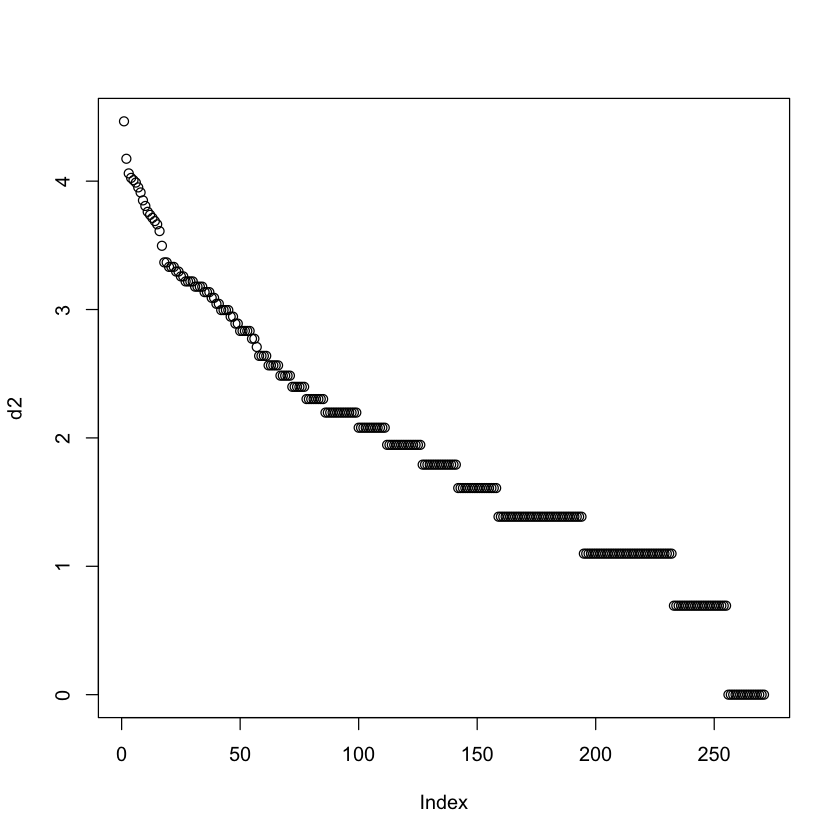

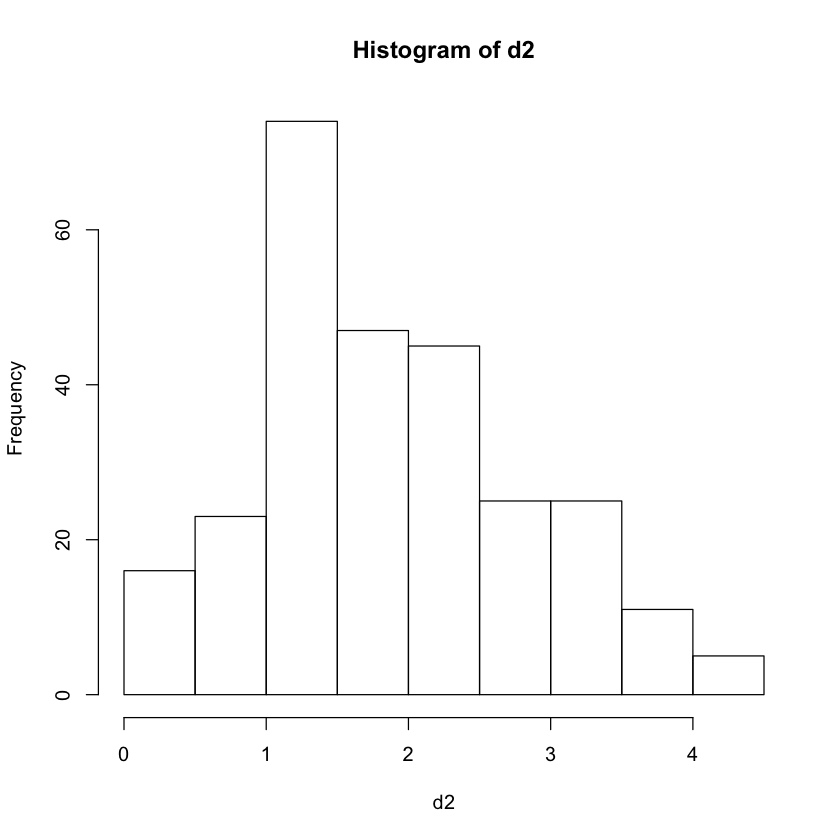

In [47]:
dataSecond <- data[dataD$DayOfWeek==2,1]
d2<- log(dataSecond)
plot(d2)
hist(d2, breaks="FD")

In [20]:
summary(dataSecond)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    3.00    6.00   10.62   12.00   87.00 

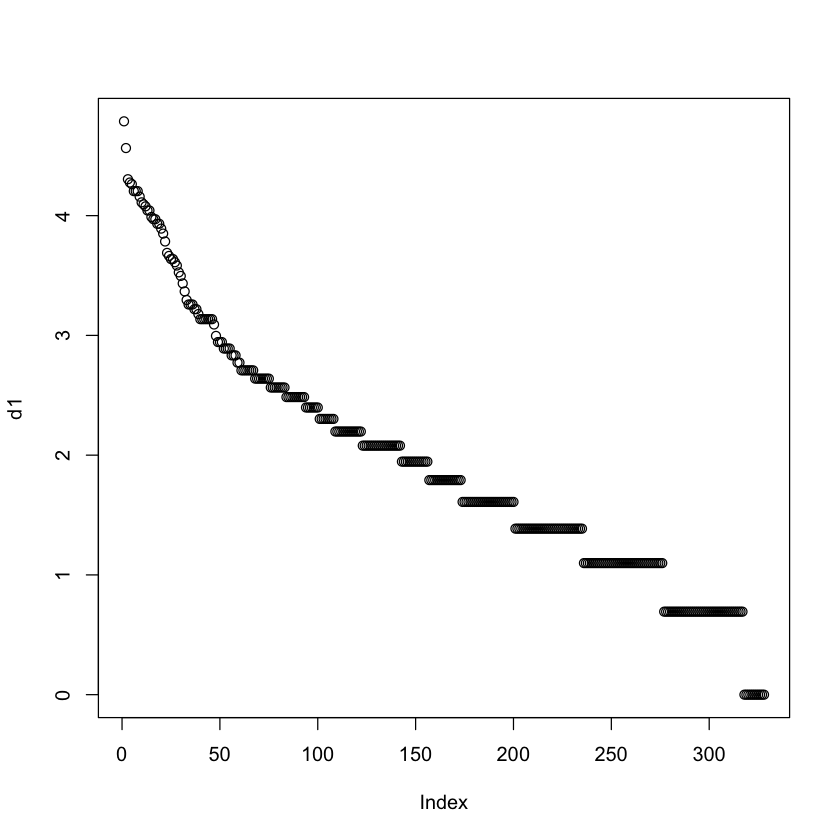

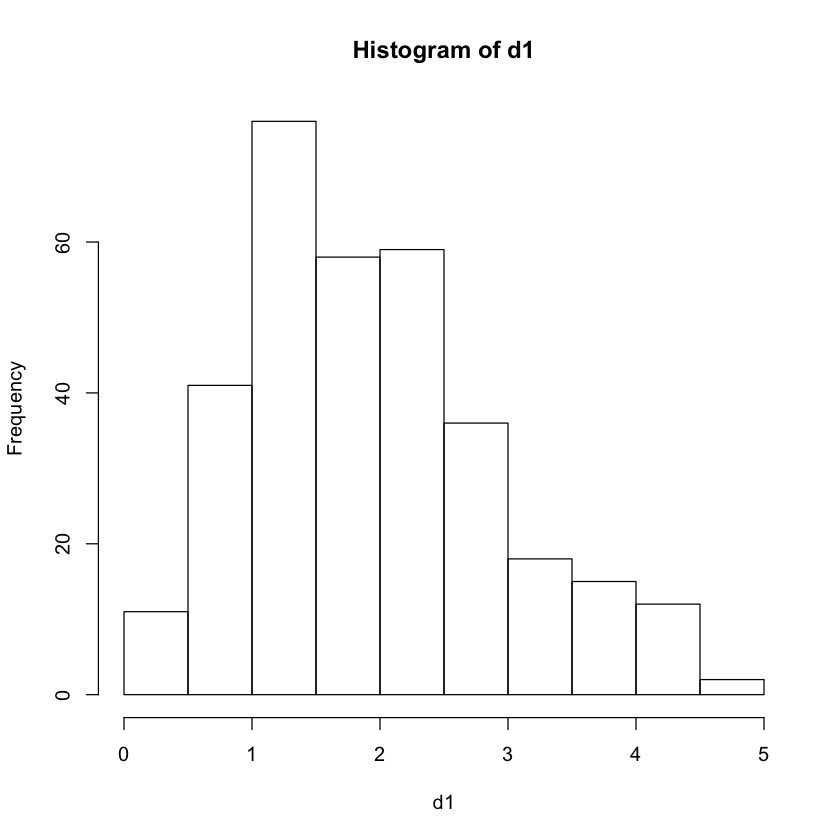

In [46]:
datathird <- data[dataD$DayOfWeek==3,1]
d1<- log(datathird)
plot(d1)
hist(d1, breaks="FD")

In [25]:
summary(datathird)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    3.00    6.00   11.95   13.00  120.00 

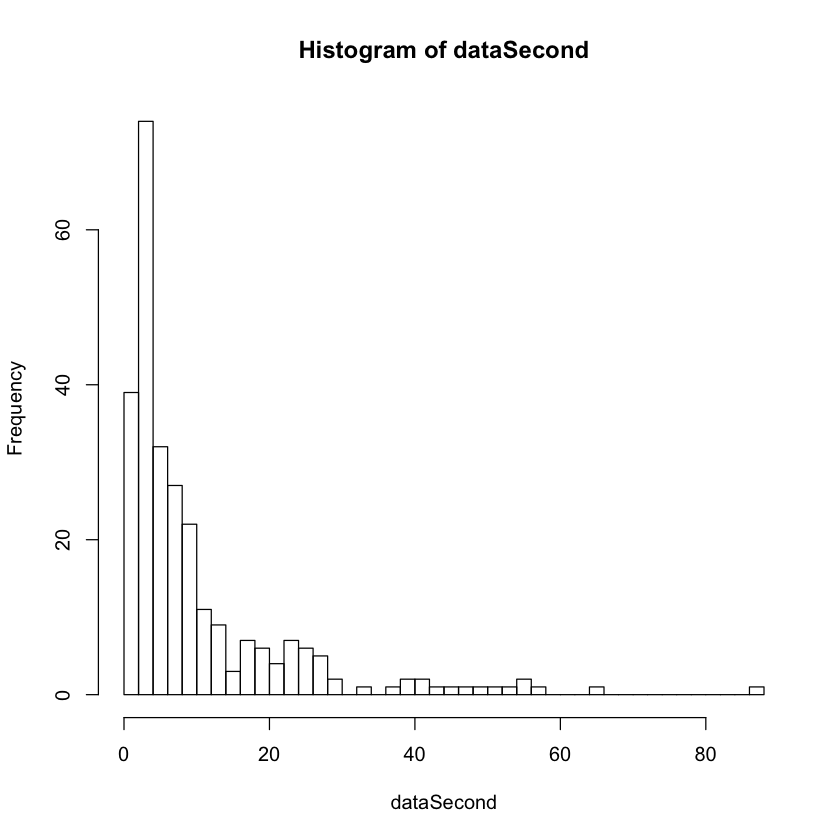

In [30]:
hist(dataSecond, breaks="FD")

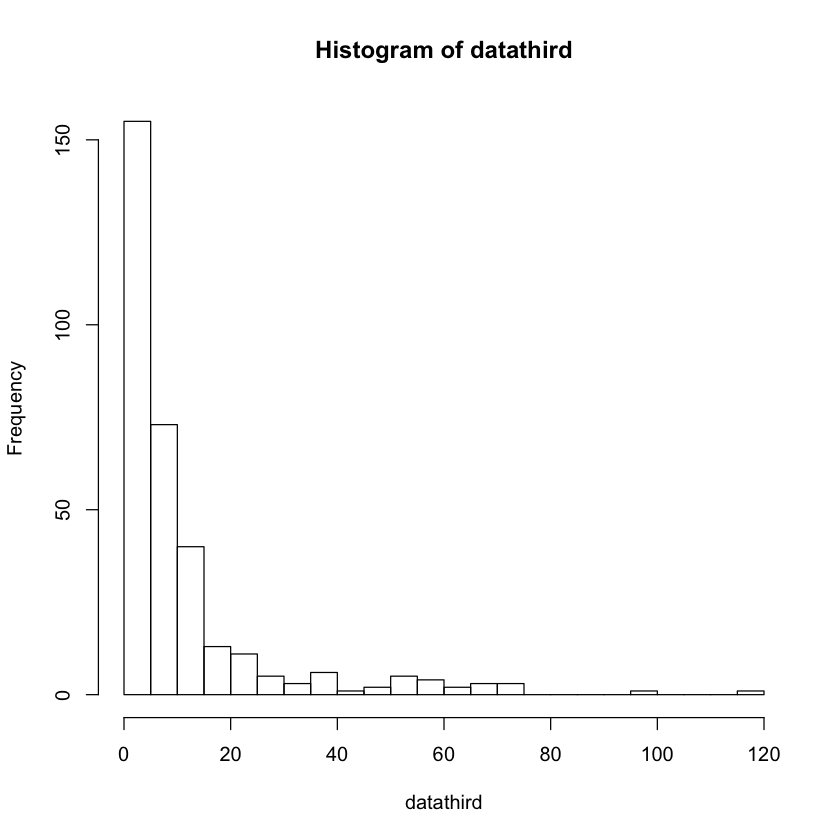

In [31]:
hist(datathird, breaks="FD")

In [38]:
wilcox.test(dataSecond, mu=9)
wilcox.test(datathird, mu=9)


	Wilcoxon signed rank test with continuity correction

data:  datathird
V = 21075, p-value = 0.02311
alternative hypothesis: true location is not equal to 9



	Wilcoxon signed rank test with continuity correction

data:  dataSecond
V = 14204, p-value = 0.04645
alternative hypothesis: true location is not equal to 9


In [41]:
t.test(dataSecond, mu=10)
t.test(datathird, mu=10)


	One Sample t-test

data:  dataSecond
t = 0.8113, df = 270, p-value = 0.4179
alternative hypothesis: true mean is not equal to 10
95 percent confidence interval:
  9.115546 12.124307
sample estimates:
mean of x 
 10.61993 



	One Sample t-test

data:  datathird
t = 2.1674, df = 327, p-value = 0.03092
alternative hypothesis: true mean is not equal to 10
95 percent confidence interval:
 10.17965 13.71060
sample estimates:
mean of x 
 11.94512 


In [48]:
wilcox.test(dataSecond, datathird)


	Wilcoxon rank sum test with continuity correction

data:  dataSecond and datathird
W = 43694, p-value = 0.7214
alternative hypothesis: true location shift is not equal to 0


In [49]:
t.test(dataSecond, datathird)


	Welch Two Sample t-test

data:  dataSecond and datathird
t = -1.1243, df = 594.54, p-value = 0.2613
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.6400582  0.9896667
sample estimates:
mean of x mean of y 
 10.61993  11.94512 


In [50]:
wilcox.test(d1, d2)
t.test(d1, d2)


	Wilcoxon rank sum test with continuity correction

data:  d1 and d2
W = 45194, p-value = 0.7214
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  d1 and d2
t = 0.63644, df = 580.94, p-value = 0.5247
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1084702  0.2124694
sample estimates:
mean of x mean of y 
 1.913405  1.861405 


In [53]:
mood.test(d1, d2)


	Mood two-sample test of scale

data:  d1 and d2
Z = 0.22041, p-value = 0.8255
alternative hypothesis: two.sided


In [52]:
wilcox.test(d1, d2)


	Wilcoxon rank sum test with continuity correction

data:  d1 and d2
W = 45194, p-value = 0.7214
alternative hypothesis: true location shift is not equal to 0


# Урок Проверка гипотез о равенстве средних для нескольких зависимых и независимых групп

In [5]:
data56<-read.csv("dataIndependentMeans.csv", sep=";", dec = ".")

In [6]:
summary(data56)

     Clicks                     City     
 Min.   :  1.000   Moscow         :1974  
 1st Qu.:  1.000   Novosibirsk    : 600  
 Median :  3.000   SaintPetersburg:1932  
 Mean   :  8.549                         
 3rd Qu.:  8.000                         
 Max.   :407.000                         

In [6]:
library("Hmisc")
describe(data56)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, units



data56 

 2  Variables      4506  Observations
--------------------------------------------------------------------------------
Clicks 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    4506        0      115    0.966    8.549    11.62        1        1 
     .25      .50      .75      .90      .95 
       1        3        8       18       28 

lowest :   1   2   3   4   5, highest: 327 355 367 395 407
--------------------------------------------------------------------------------
City 
       n  missing distinct 
    4506        0        3 
                                                          
Value               Moscow     Novosibirsk SaintPetersburg
Frequency             1974             600            1932
Proportion           0.438           0.133           0.429
--------------------------------------------------------------------------------

In [7]:
summary(data56)

     Clicks                     City     
 Min.   :  1.000   Moscow         :1974  
 1st Qu.:  1.000   Novosibirsk    : 600  
 Median :  3.000   SaintPetersburg:1932  
 Mean   :  8.549                         
 3rd Qu.:  8.000                         
 Max.   :407.000                         

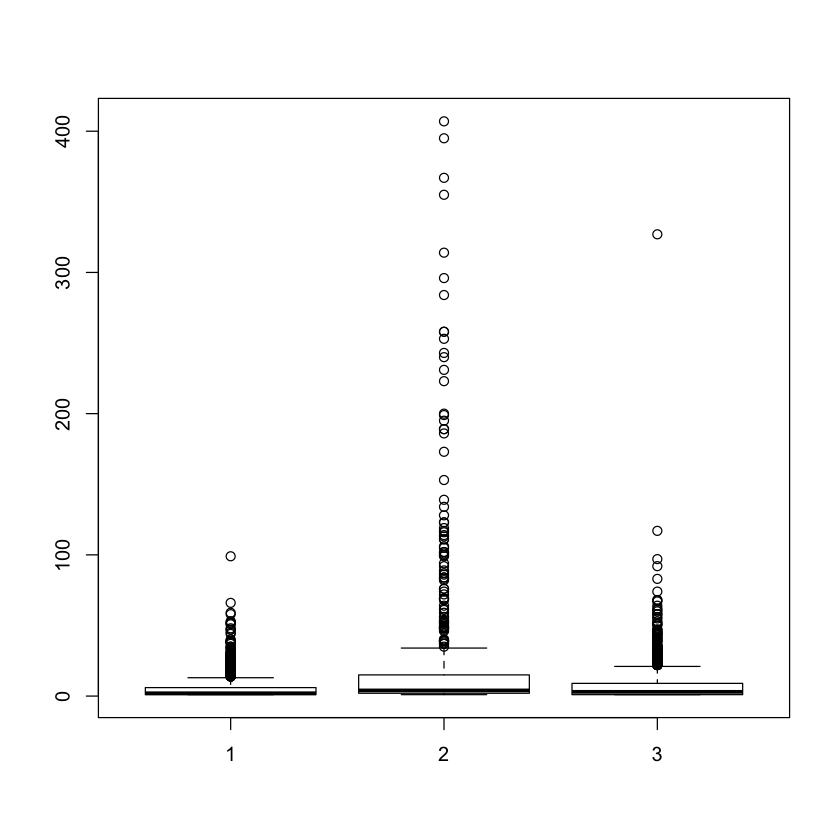

In [11]:
boxplot(data56$Clicks[data56$City=="Moscow"],data56$Clicks[data56$City=="Novosibirsk"],data56$Clicks[data56$City=="SaintPetersburg"])

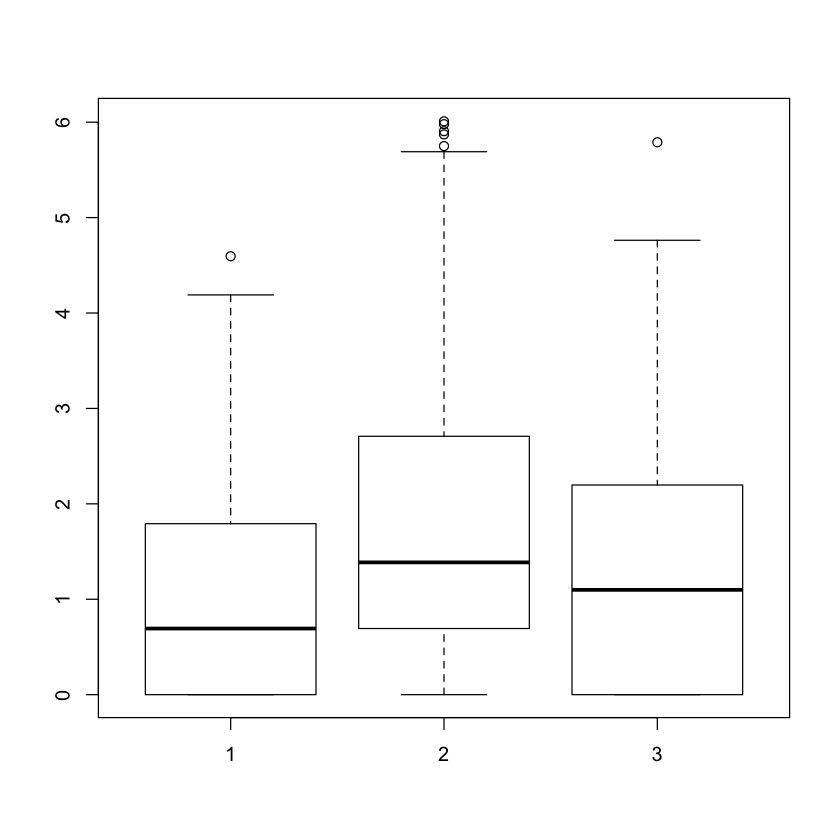

In [14]:
boxplot(log(data56$Clicks[data56$City=="Moscow"]),log(data56$Clicks[data56$City=="Novosibirsk"]), log(data56$Clicks[data56$City=="SaintPetersburg"]))

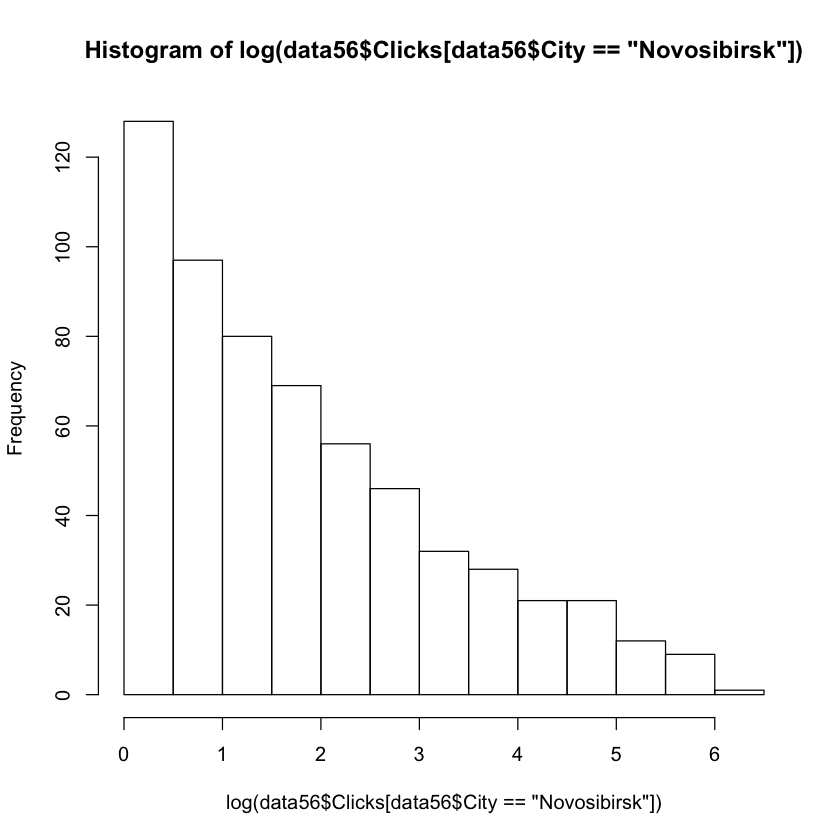

In [23]:
hist(log(data56$Clicks[data56$City=="Novosibirsk"]), breaks = "FD")

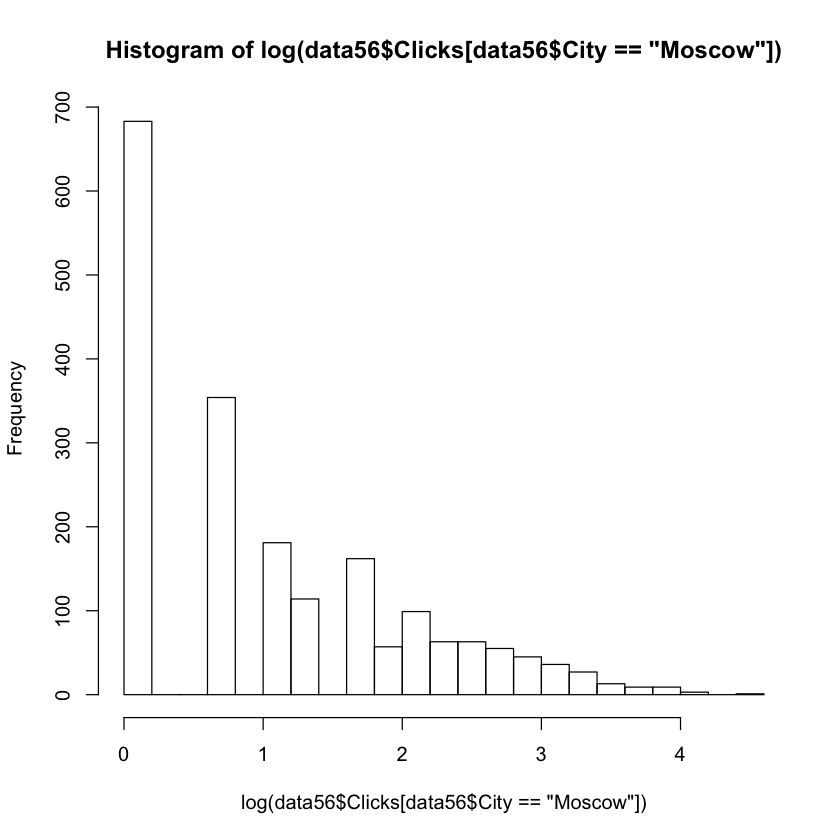

In [24]:
hist(log(data56$Clicks[data56$City=="Moscow"]), breaks = "FD")

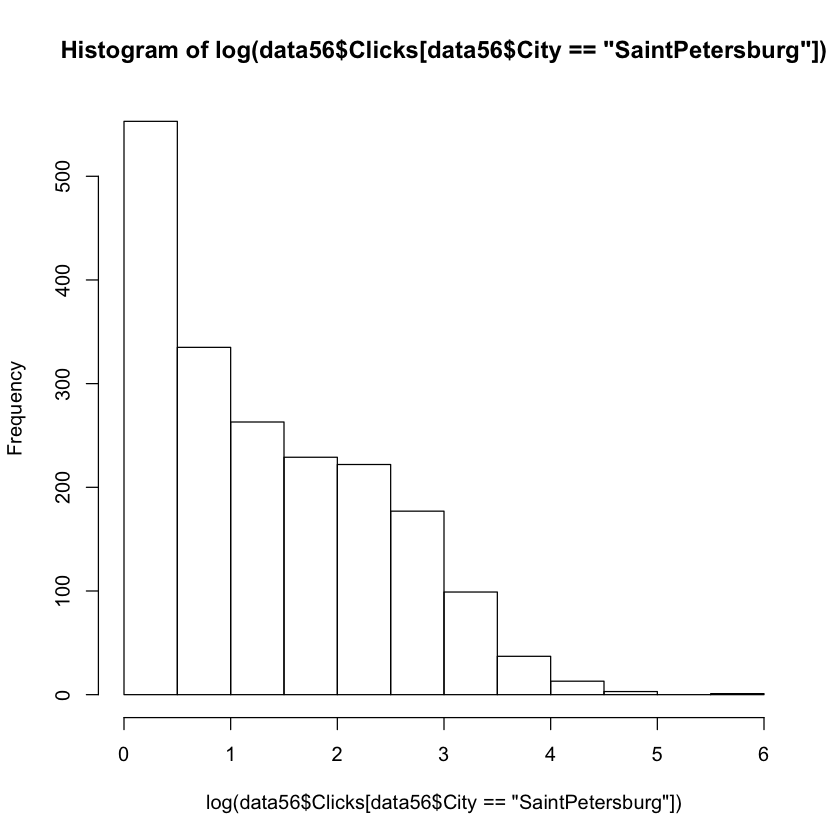

In [25]:
hist(log(data56$Clicks[data56$City=="SaintPetersburg"]), breaks = "FD")

In [15]:
anova<-aov(log(Clicks)~City, data=data56)

In [16]:
summary(anova)

              Df Sum Sq Mean Sq F value Pr(>F)    
City           2    226  113.04   84.75 <2e-16 ***
Residuals   4503   6006    1.33                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Вывод: p value слишком маленький, значит нужно отвергнуть нулевую гипотезу о равенсве средних

In [27]:
kruskal.test(log(Clicks)~City, data=data56)


	Kruskal-Wallis rank sum test

data:  log(Clicks) by City
Kruskal-Wallis chi-squared = 99.404, df = 2, p-value < 2.2e-16


Вывод: p value слишком маленький, значит нужно отвергнуть нулевую гипотезу о равенсве средних

In [29]:
data57<-read.csv("dataDependentMeans.csv", sep=";", dec = ".")

In [30]:
summary(data57)

     Clicks            Month    
 Min.   :   231   April   :143  
 1st Qu.:  1829   February:143  
 Median :  4692   March   :143  
 Mean   : 16500                 
 3rd Qu.: 19213                 
 Max.   :159350                 

Данные полученные от отного и того же обхекта => зависимые

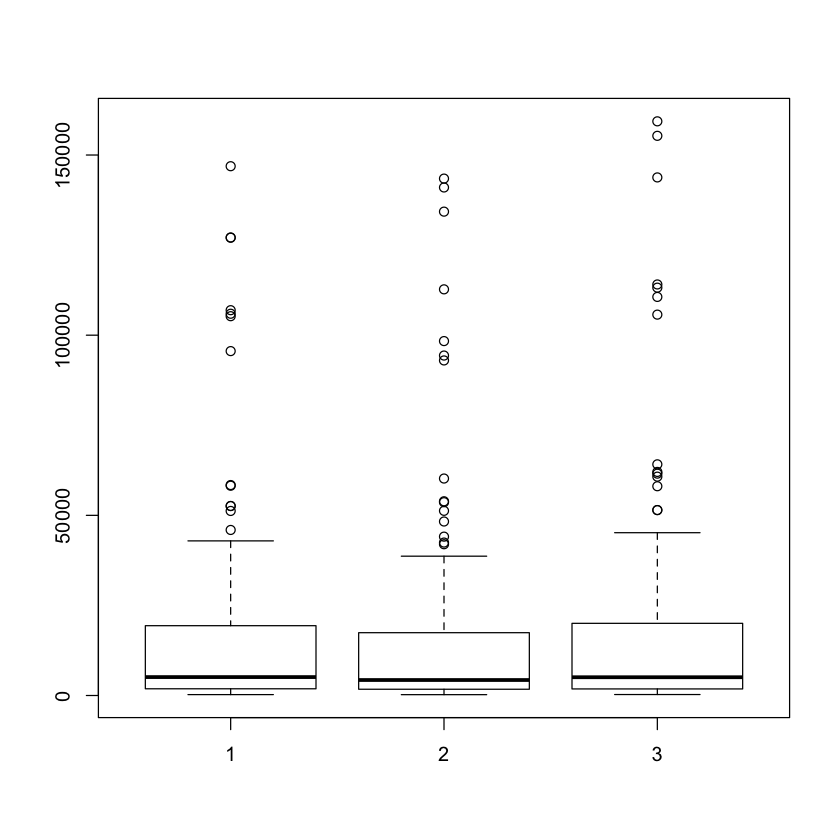

In [34]:
boxplot(data57$Clicks[data56$Month=="April"],(data57$Clicks[data56$Month=="February"]),(data57$Clicks[data56$Month=="March"]))

In [37]:
dataMatrix<-matrix(data57$Clicks, nrow=143,byrow= TRUE, dimnames=list(1:143, c('February','April','March')))

In [38]:
friedman.test(dataMatrix)


	Friedman rank sum test

data:  dataMatrix
Friedman chi-squared = 9.4965, df = 2, p-value = 0.008667


In [41]:
0.008667>0.05

[1] FALSE

# Иерархический кластерный анализ

In [60]:
data45<-read.csv("DCL.csv", sep=";", dec=",")

In [61]:
summary(data45)

   university          s                e               st        
 Min.   : 1.00   Min.   : 80000   Min.   :63.80   Min.   :0.4500  
 1st Qu.: 5.75   1st Qu.: 89250   1st Qu.:74.17   1st Qu.:0.6225  
 Median :10.50   Median :112500   Median :84.30   Median :0.7800  
 Mean   :10.50   Mean   :117100   Mean   :82.69   Mean   :0.7260  
 3rd Qu.:15.25   3rd Qu.:141250   3rd Qu.:90.83   3rd Qu.:0.8325  
 Max.   :20.00   Max.   :180000   Max.   :96.50   Max.   :0.9000  

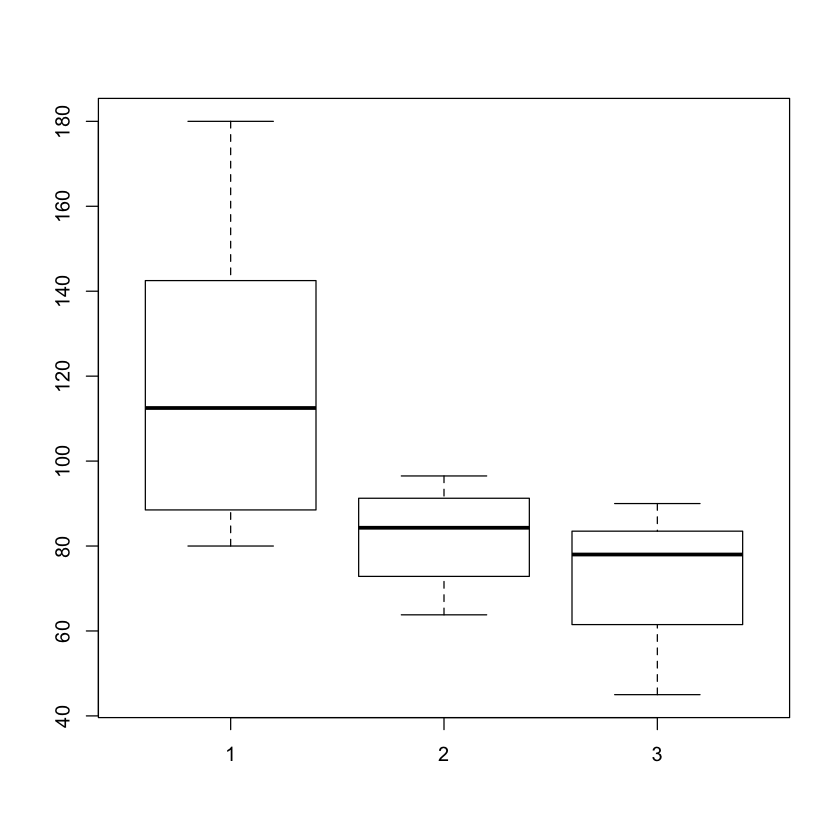

In [62]:
boxplot(data45$s/1000, data45$e, data45$st*100)

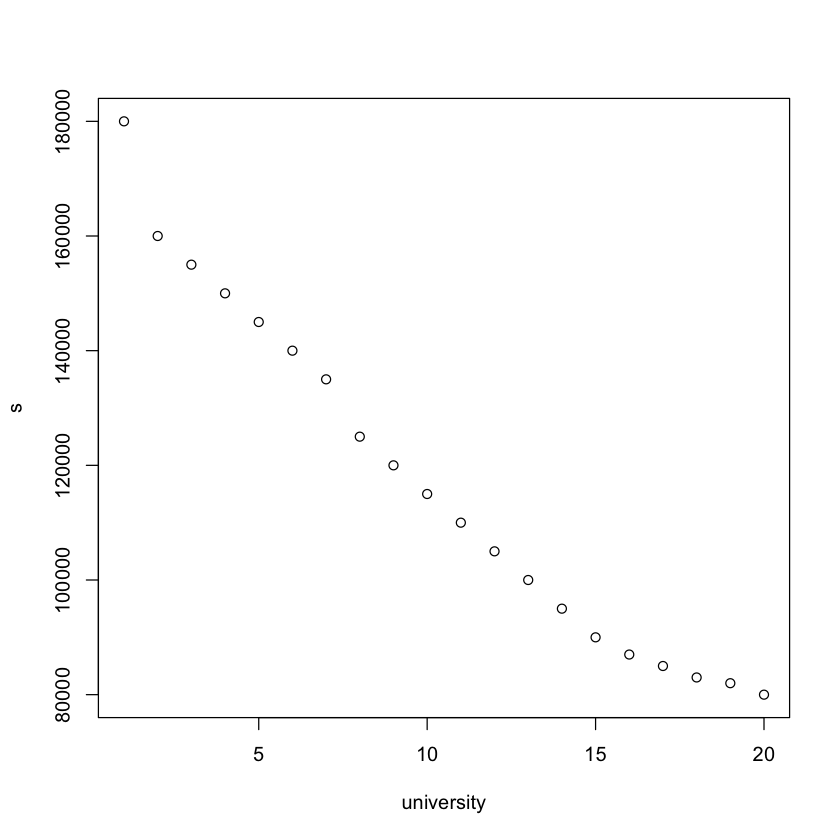

In [63]:
plot(data45$university,data45$s, 
     xlab = "university", ylab = "s")

In [64]:
hr<-hclust(dist(data45))

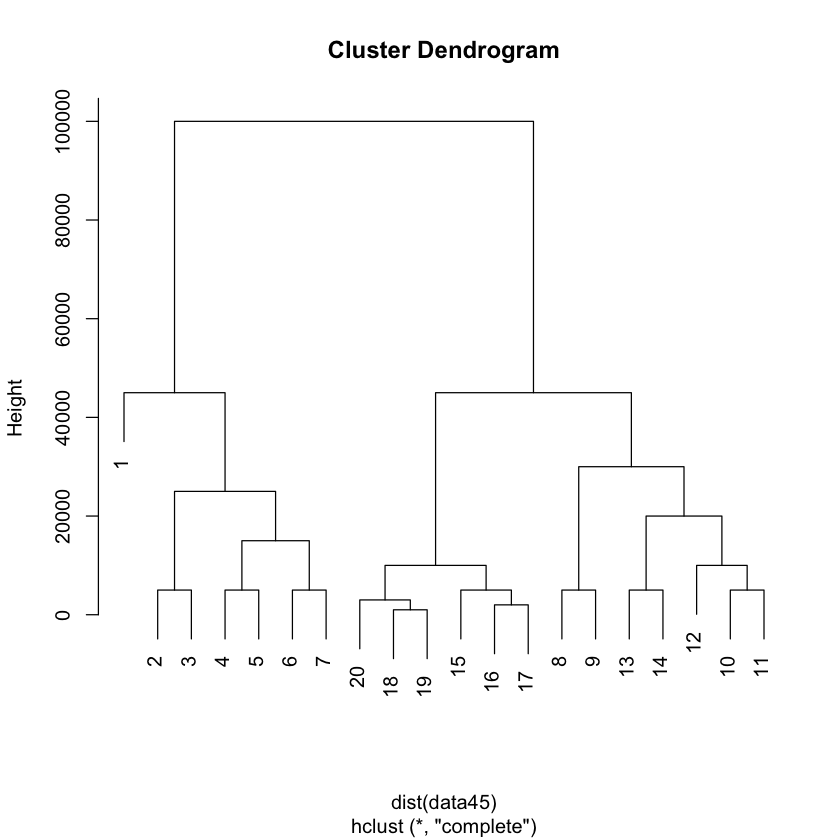

In [65]:
plot(hr)

# Построение кластерного анализа с помощью k-средних

In [66]:
cluster<-kmeans(data45[,1:3], centers=5, nstar=20)

In [67]:
cluster

K-means clustering with 5 clusters of sizes 5, 7, 3, 4, 1

Cluster means:
  university        s        e
1       11.0 110000.0 84.20000
2       17.0  86000.0 71.24286
3        7.0 133333.3 88.76667
4        3.5 152500.0 92.82500
5        1.0 180000.0 96.50000

Clustering vector:
 [1] 5 4 4 4 4 3 3 3 1 1 1 1 1 2 2 2 2 2 2 2

Within cluster sum of squares by cluster:
[1] 250000064 160000310 116666693 125000047         0
 (between_SS / total_SS =  96.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

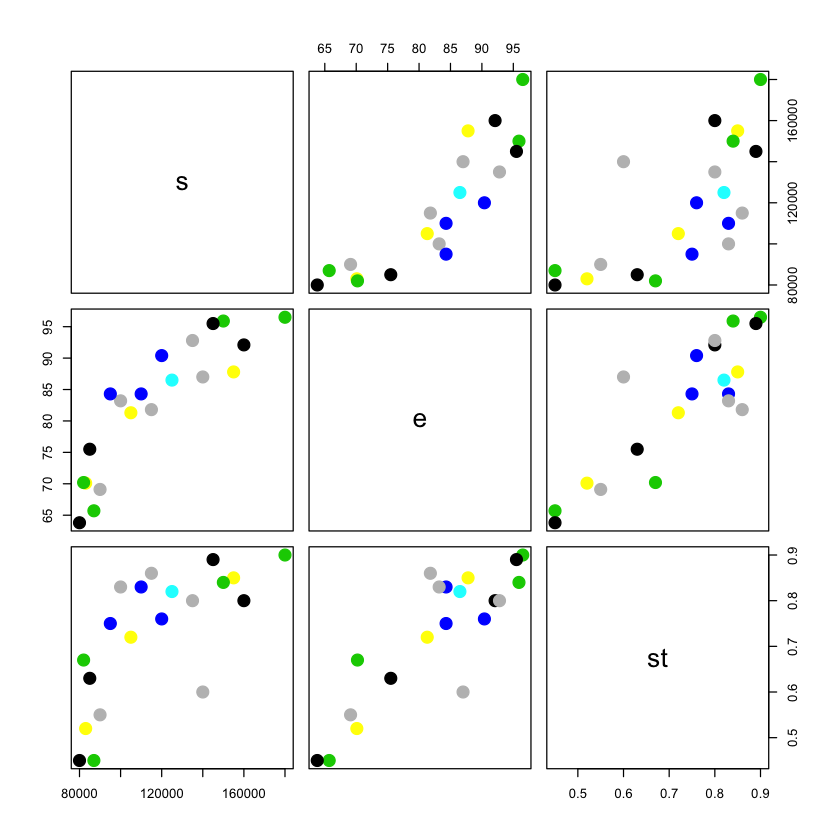

In [68]:
plot(data45[,2:4], col=cluster$centers, pch=20,cex=3)

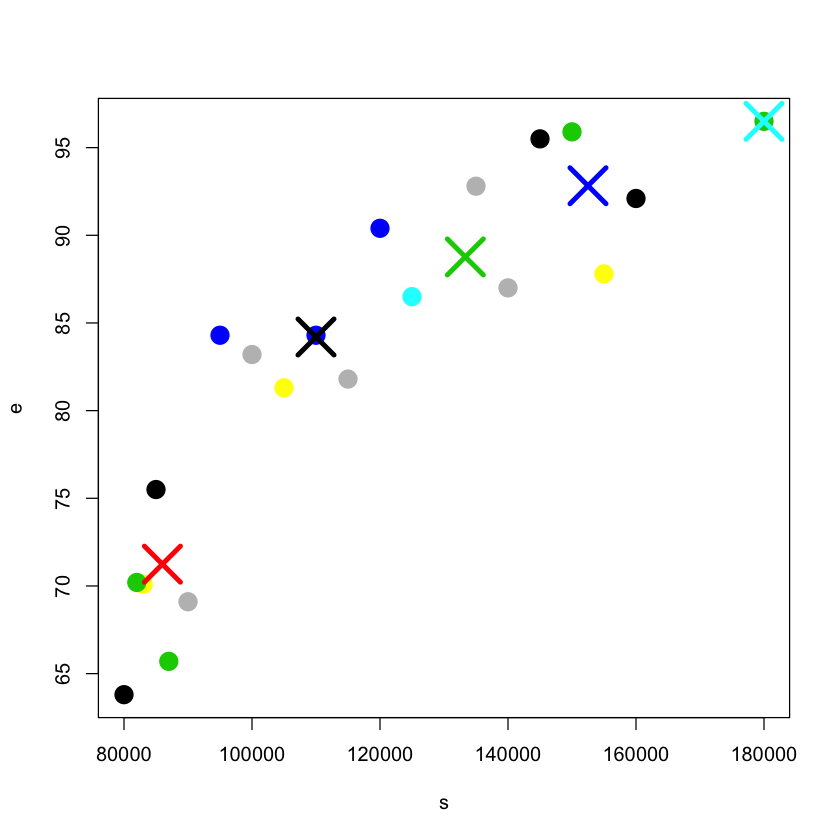

In [82]:
plot(data45[,2:3], col=cluster$centers, pch=20,cex=3)
points(cluster$centers[, 2:3],pch=4,cex=4, lwd=4, col=as.integer(rownames(cluster$centers[, 2:3])))

In [83]:
cluster$iter

[1] 2

In [84]:
cluster$size

[1] 5 7 3 4 1

In [86]:
cluster$totss

[1] 17433802708

In [87]:
cluster$withinss

[1] 250000064 160000310 116666693 125000047         0

In [88]:
cluster$tot.withinss

[1] 651667114

In [93]:
r<-1-cluster$tot.withinss/cluster$totss
r<-1-cluster$tot.withinss/cluster$totss

In [94]:
r

[1] 0.9626205

In [98]:
r_adj<-1-(cluster$tot.withinss*(nrow(data45)-1))/(cluster$totss*(nrow(data45)-5))
r_adj

[1] 0.9526526